### Preprocessing

In [2]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [3]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [4]:
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Auto.csv"
Auto = pd.read_csv(url)

Text(0.5,1,"missing values in Auto['horsepower']")

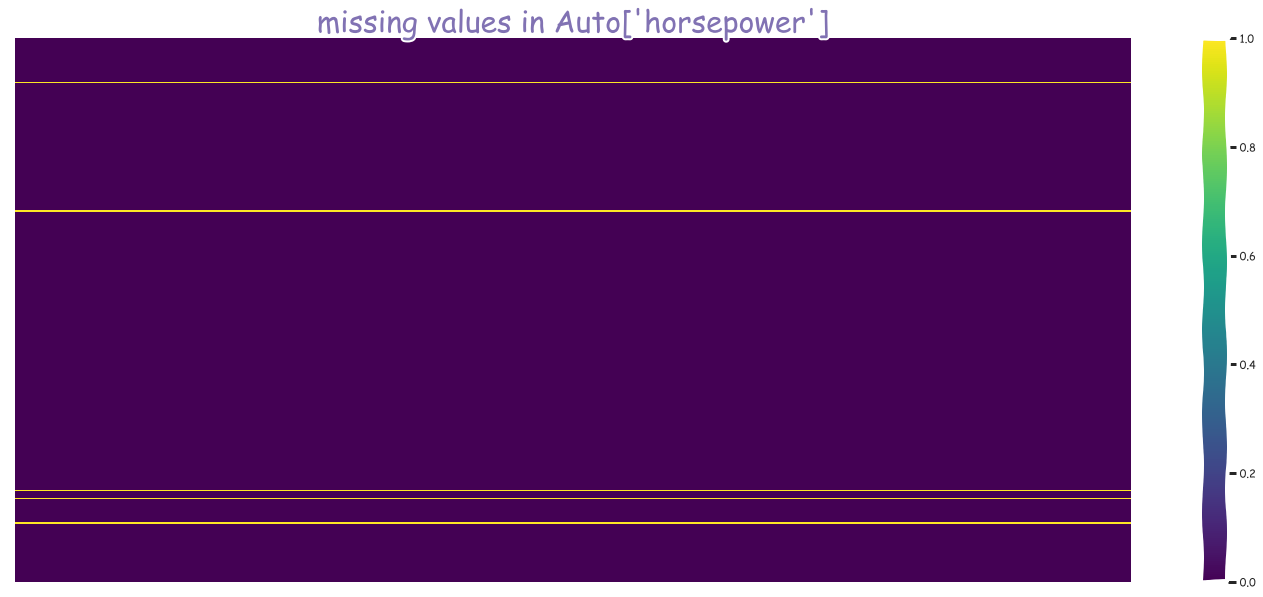

In [7]:
plt.xkcd()
plt.figure(figsize=(25, 10))
sns.heatmap(Auto[['horsepower']]=='?', yticklabels=False, xticklabels=False, cmap='viridis')
plt.title("missing values in Auto['horsepower']", fontsize=30, color='m')

In [8]:
Auto.loc[Auto.horsepower=="?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [9]:
Auto.shape

(397, 9)

In [10]:
Auto.drop(index=[32, 126, 330, 336, 354], inplace=True)

In [11]:
Auto.shape

(392, 9)

*So,I have deleted the rows containing erroneous values of horsepower.*

Text(0.5,1,"missing values in Auto['horsepower']")

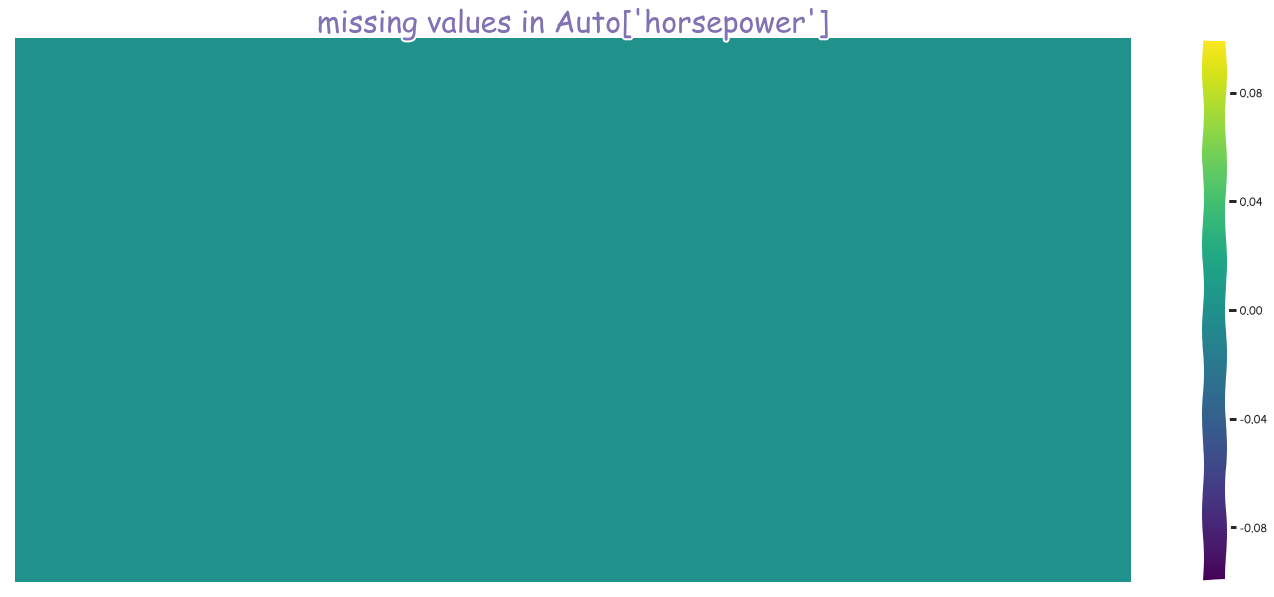

In [13]:
plt.xkcd()
plt.figure(figsize=(25, 10))
sns.heatmap(Auto[['horsepower']]=='?', yticklabels=False, xticklabels=False, cmap='viridis')
plt.title("missing values in Auto['horsepower']", fontsize=30, color='m')

*See, no missing values!*

In [15]:
Auto.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.614535
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.585005,0.212746,0.181528,1.000000


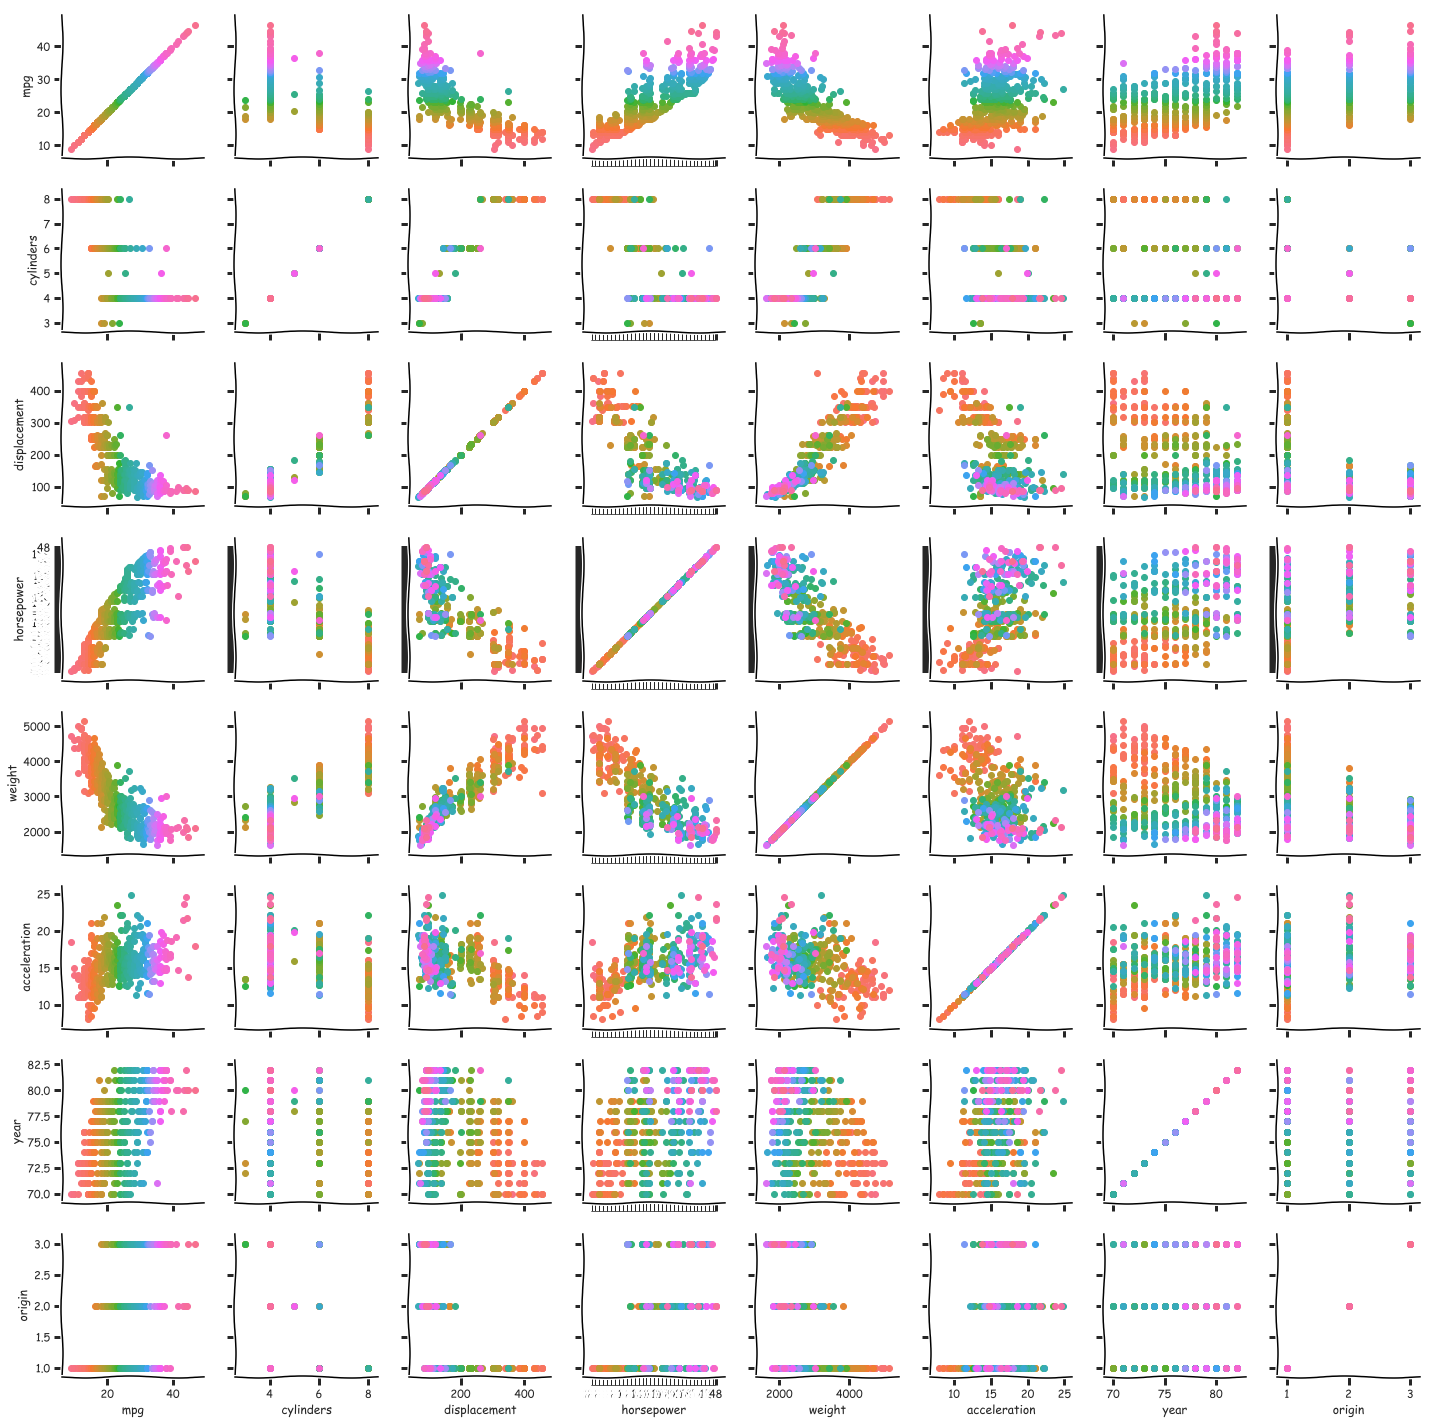

In [16]:
sns.PairGrid(Auto, hue='mpg').map(plt.scatter)

**From the pairplots, it appears that displacement, weight and acceleration have non-linear relationships with mpg.**

**Polynomial**

In [17]:
from sklearn.model_selection import KFold as KF, cross_val_score as CVS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.feature_selection import f_classif
import warnings
warnings.filterwarnings('ignore')

*Checking for non-linear relationship between mpg and displacement*

In [53]:
X = Auto[['displacement']]
y = Auto.mpg
df = pd.DataFrame()
MSEdf = pd.DataFrame()
SCORE = []

for k in range(0,20):
    X_k = X**k
    df = pd.concat([df, X_k], axis=1)
    df_a = np.array(df)
    lmk = LinearRegression().fit(df_a, y)
    err = pd.DataFrame([mean_squared_error(y, lmk.predict(df_a))])
    MSEdf = MSEdf.append(err)
    SCORE.append(lmk.score(df_a, y))
    
MSEdf.columns = ['MSE']
MSEdf.reset_index(drop=True, inplace=True)

SCOREdf = pd.DataFrame(SCORE)
SCOREdf.columns = ['R^2']
SCOREdf.reset_index(drop=True, inplace=True)

Text(0,0.5,'MSE')

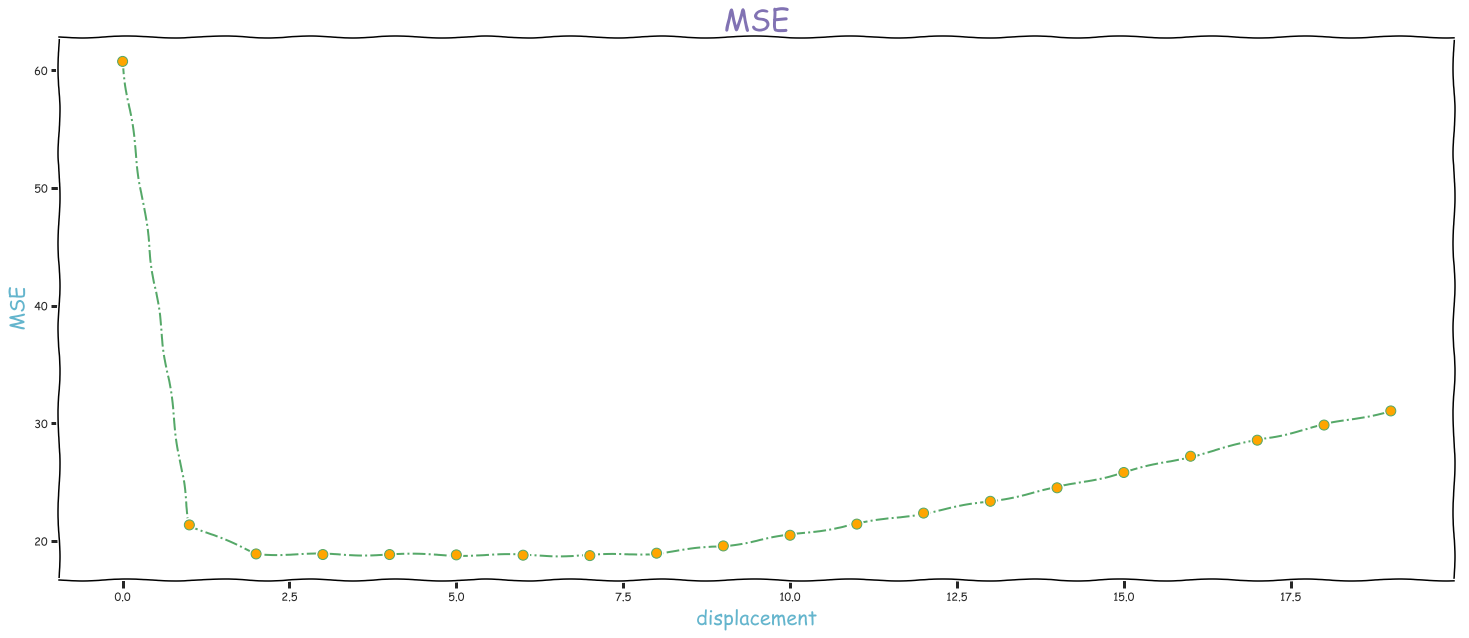

In [54]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(MSEdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("MSE", fontsize=30, color='m')
plt.xlabel("displacement", fontsize=20, color='c')
plt.ylabel("MSE", fontsize=20, color='c')

Text(0,0.5,'R^2')

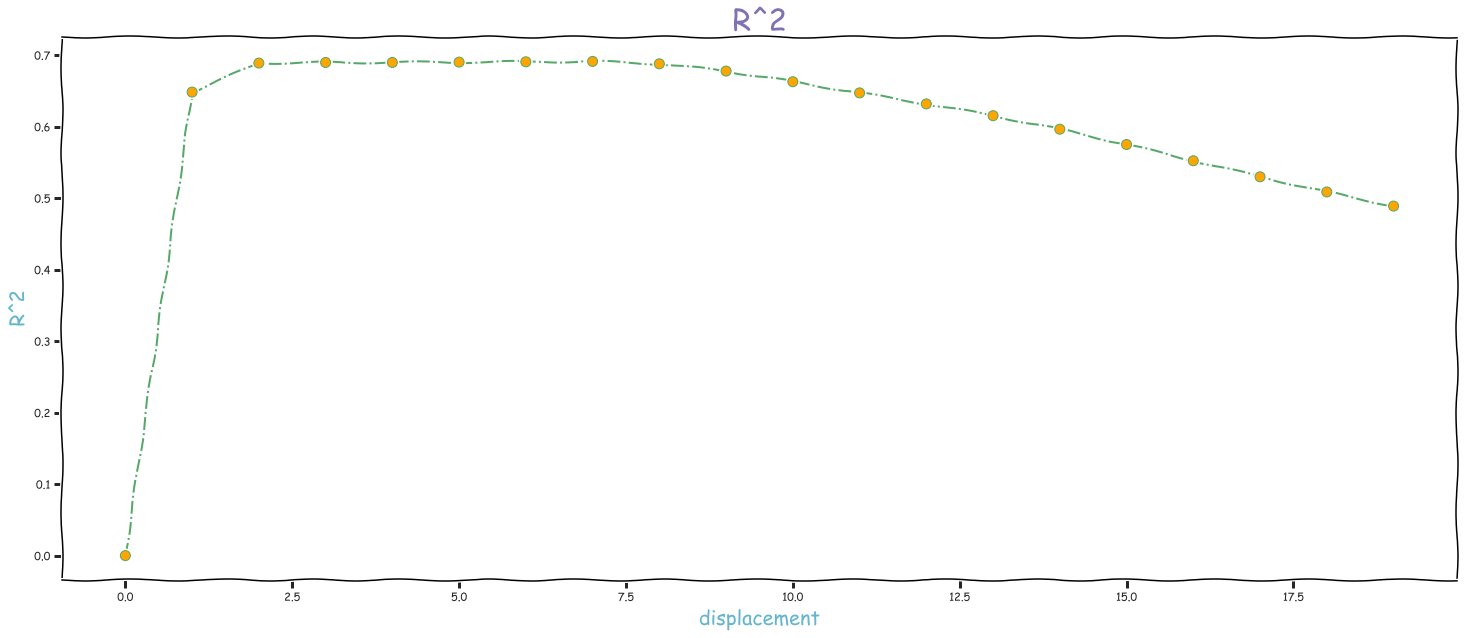

In [55]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(SCOREdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("R^2", fontsize=30, color='m')
plt.xlabel("displacement", fontsize=20, color='c')
plt.ylabel("R^2", fontsize=20, color='c')

*Checking for non-linear relationship between mpg and acceleration*

In [56]:
X = Auto[['acceleration']]
y = Auto.mpg
df = pd.DataFrame()
MSEdf = pd.DataFrame()
SCORE = []

for k in range(0,25):
    X_k = X**k
    df = pd.concat([df, X_k], axis=1)
    df_a = np.array(df)
    lmk = LinearRegression().fit(df_a, y)
    err = pd.DataFrame([mean_squared_error(y, lmk.predict(df_a))])
    MSEdf = MSEdf.append(err)
    SCORE.append(lmk.score(df_a, y))
    
MSEdf.columns = ['MSE']
MSEdf.reset_index(drop=True, inplace=True)

SCOREdf = pd.DataFrame(SCORE)
SCOREdf.columns = ['R^2']
SCOREdf.reset_index(drop=True, inplace=True)

MSEdf

,MSE
0,60.762738
1,49.873627
2,48.976954
3,48.883137
4,47.783945
5,47.710791
6,47.564778
7,47.542757
8,47.499529
9,47.438480


Text(0,0.5,'MSE')

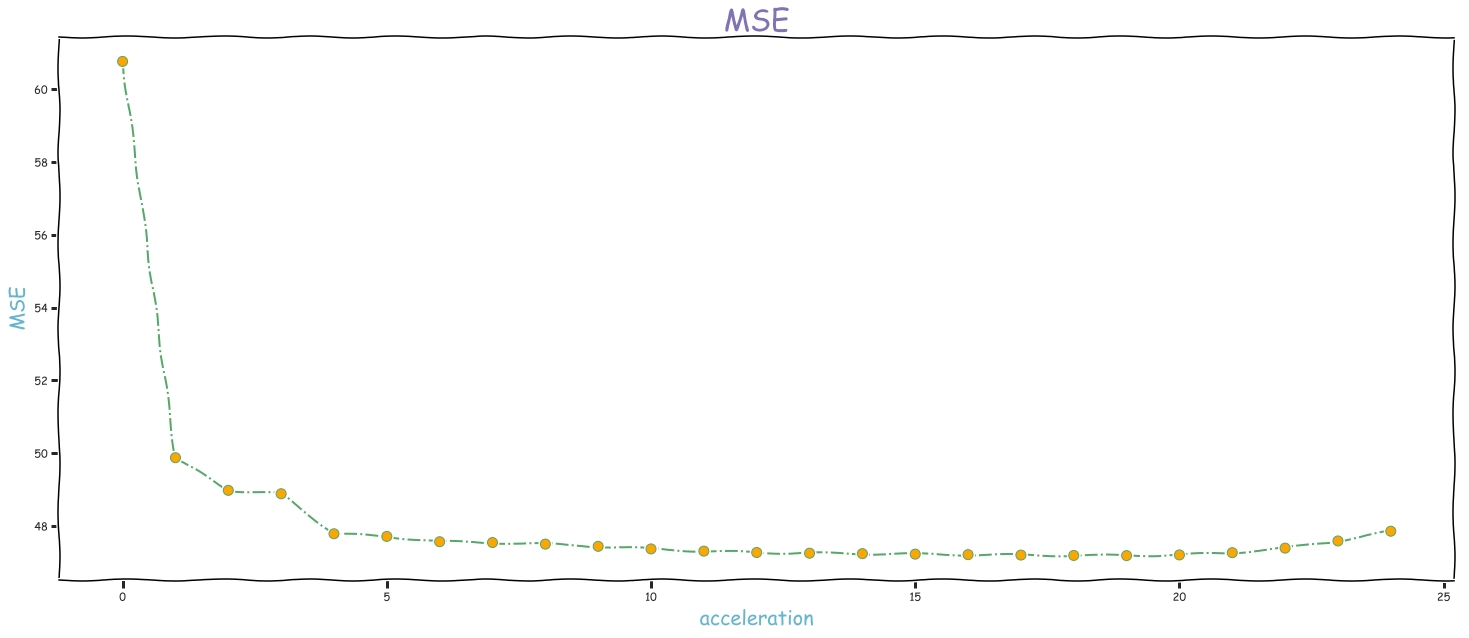

In [57]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(MSEdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("MSE", fontsize=30, color='m')
plt.xlabel("acceleration", fontsize=20, color='c')
plt.ylabel("MSE", fontsize=20, color='c')

Text(0,0.5,'R^2')

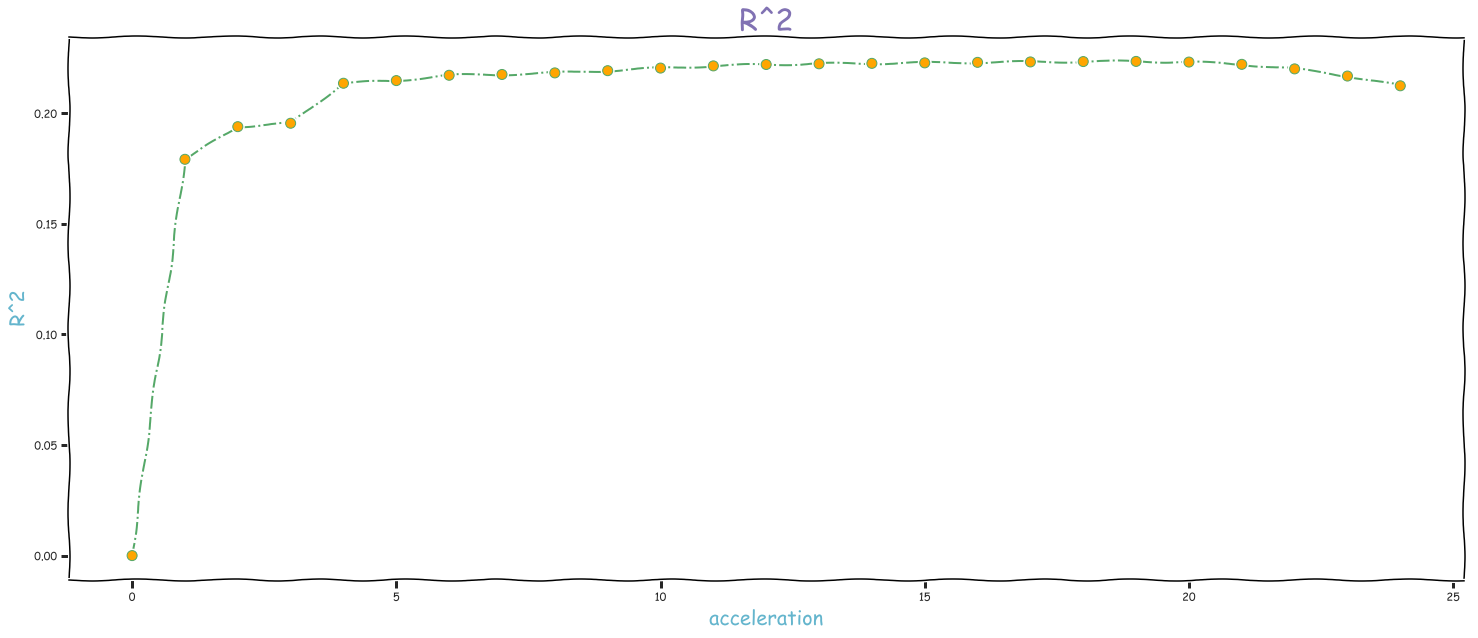

In [59]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(SCOREdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("R^2", fontsize=30, color='m')
plt.xlabel("acceleration", fontsize=20, color='c')
plt.ylabel("R^2", fontsize=20, color='c')

*Checking for non-linear relationship between mpg and weight*

In [60]:
X = Auto[['weight']]
y = Auto.mpg
df = pd.DataFrame()
MSEdf = pd.DataFrame()
SCORE = []

for k in range(0,25):
    X_k = X**k
    df = pd.concat([df, X_k], axis=1)
    df_a = np.array(df)
    lmk = LinearRegression().fit(df_a, y)
    err = pd.DataFrame([mean_squared_error(y, lmk.predict(df_a))])
    MSEdf = MSEdf.append(err)
    SCORE.append(lmk.score(df_a, y))
    
MSEdf.columns = ['MSE']
MSEdf.reset_index(drop=True, inplace=True)

SCOREdf = pd.DataFrame(SCORE)
SCOREdf.columns = ['R^2']
SCOREdf.reset_index(drop=True, inplace=True)

MSEdf

,MSE
0,60.762738
1,18.676617
2,17.308415
3,17.308291
4,17.288178
5,17.291957
6,17.243643
7,17.243516
8,17.199027
9,17.183950


Text(0,0.5,'MSE')

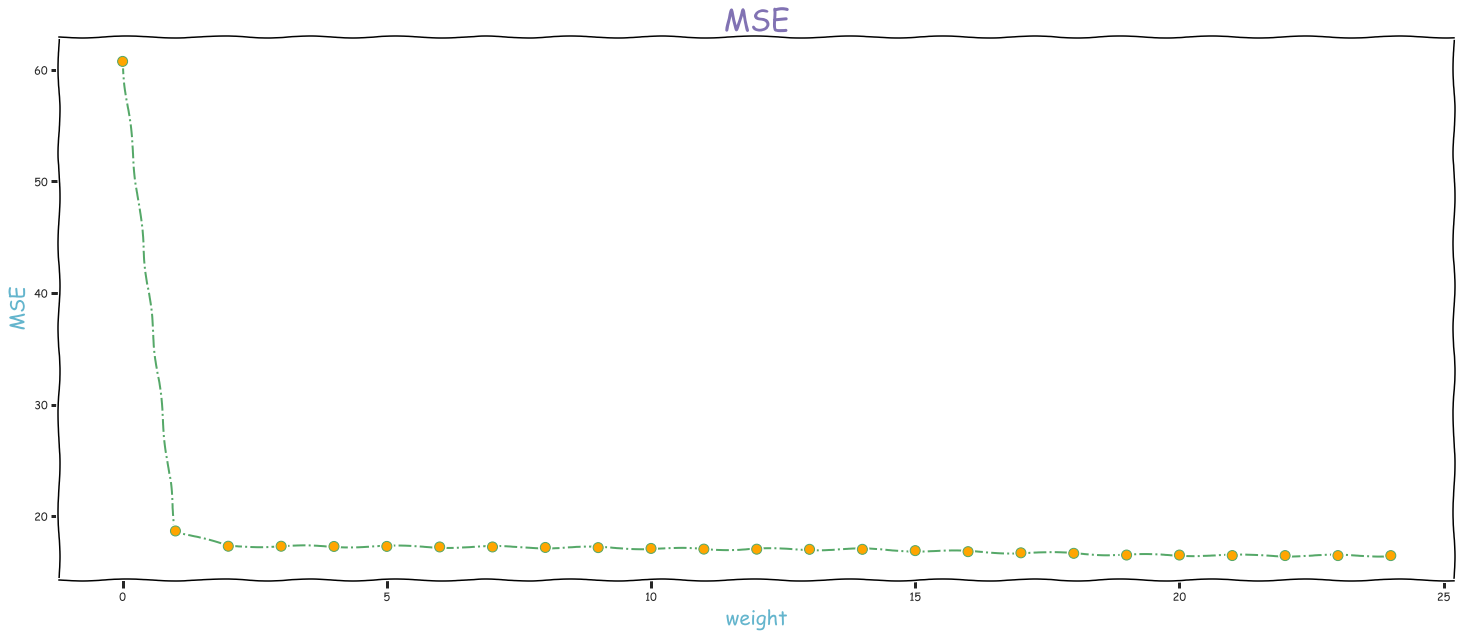

In [62]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(MSEdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("MSE", fontsize=30, color='m')
plt.xlabel("weight", fontsize=20, color='c')
plt.ylabel("MSE", fontsize=20, color='c')

Text(0,0.5,'R^2')

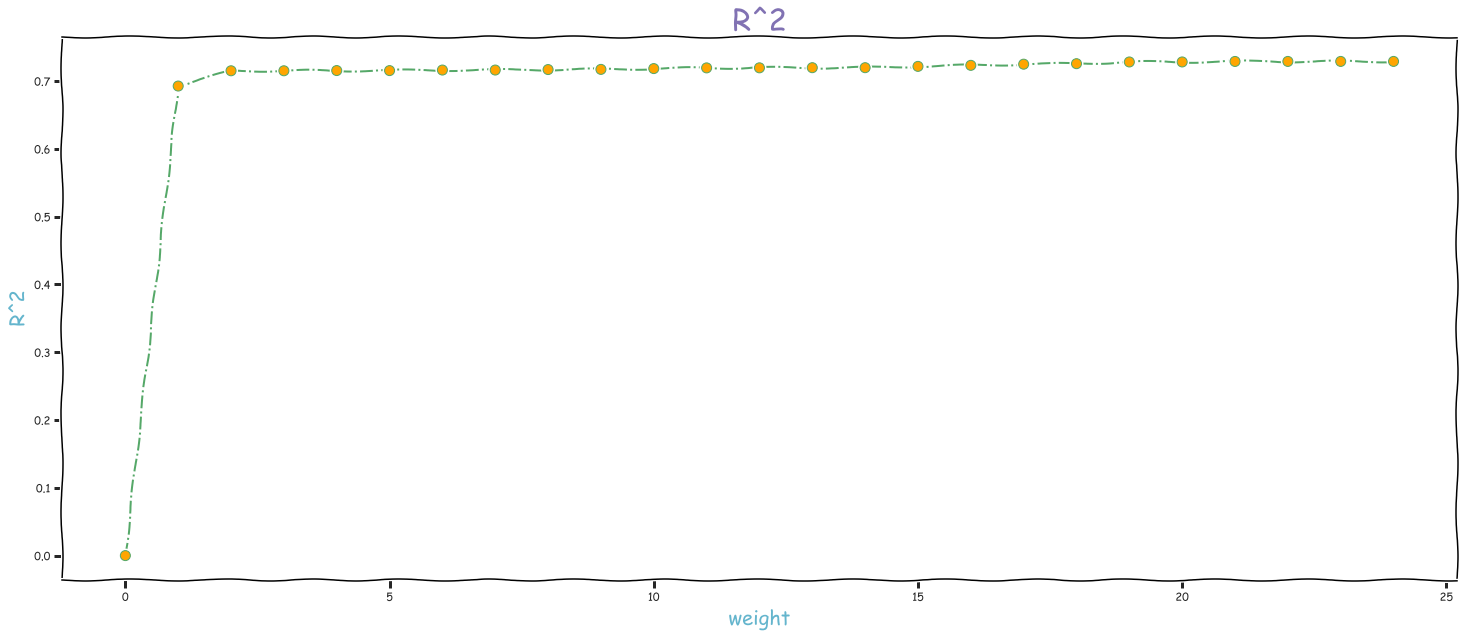

In [63]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(SCOREdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("R^2", fontsize=30, color='m')
plt.xlabel("weight", fontsize=20, color='c')
plt.ylabel("R^2", fontsize=20, color='c')

**In all these variables, I notice there is some form of non-linear relationship. However, the order at which they give the best fit is quite high. However, one needs to keep in mind that these scores are not cross-validated, which makes them extremely susceptible to variance. However, their non-linear relationhip with 'mpg' cannot be argued against.**